# Notebook 5 - County Level Analysis

In this notebook, we examine the relationship between GDP and Education Level,(using percentage of population with a bachelor's degree as an indicator). We compile county data, for some of the US states with the highest population. Using scatterplots, we check for a relationship between these two variables.

The dataframe created in Notebook 2, which contains the percentage of adults with a bachelor's degree or higher, and the GDP for capita, is used here. 

In [3]:
import pandas as pd
from plotnine import *

df = pd.read_csv('../data/gdp_and_census.csv')



In [4]:
correlation_coefficient = df["Percent of Population with a Bachelor's Degree"].corr(df["GDP per Capita 2017"])
correlation_text = f"Correlation: {correlation_coefficient:.2f}"
correlation_text

'Correlation: 0.06'

In [5]:
df

,state,county,GEO_ID,Number of Educational Institutions,Percent of Population with a Bachelor's Degree,GDP per Capita 2017
0,1,1,1001,0.0,18.273684,25.839051
1,1,3,1003,34.0,20.436842,27.172905
2,1,9,1009,3.0,18.923077,14.114381
3,1,15,1015,0.0,16.352941,33.422040
4,1,25,1025,0.0,17.007692,31.323492
...,...,...,...,...,...,...
1388,56,25,56025,22.0,17.007692,61.841477
1389,56,29,56029,0.0,17.300000,45.403061
1390,56,33,56033,0.0,16.300000,40.738787
1391,56,37,56037,0.0,19.769231,88.922249


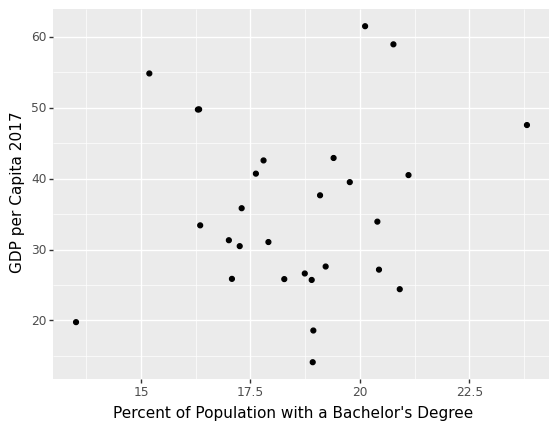

In [6]:
filtered_data = df[df['state'] == 1]
plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
        geom_point() +
        labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017"))

print(plot)




For all states in America, we plot the GDP per Capita and Percent of Population with a Bachelor's Degree

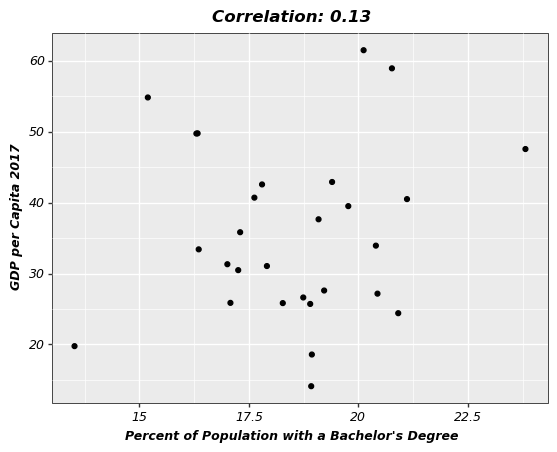

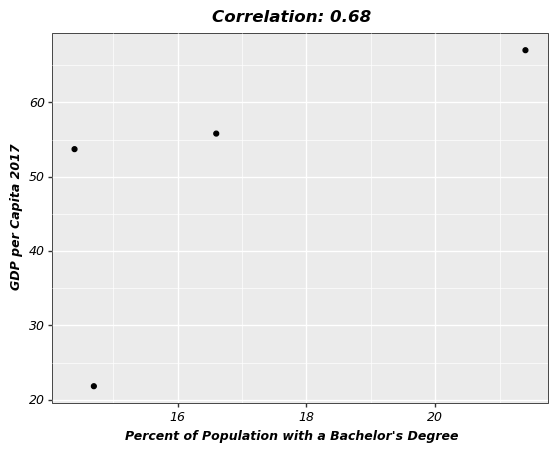

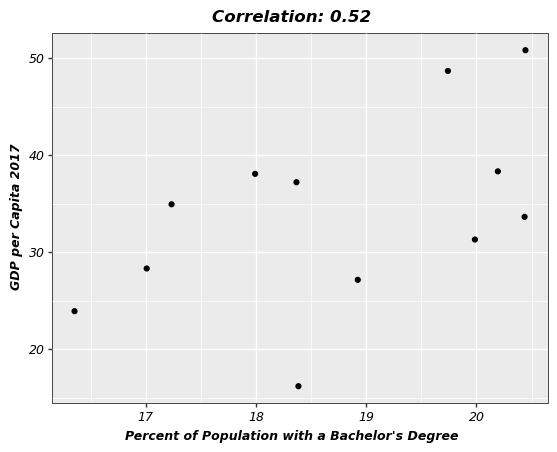

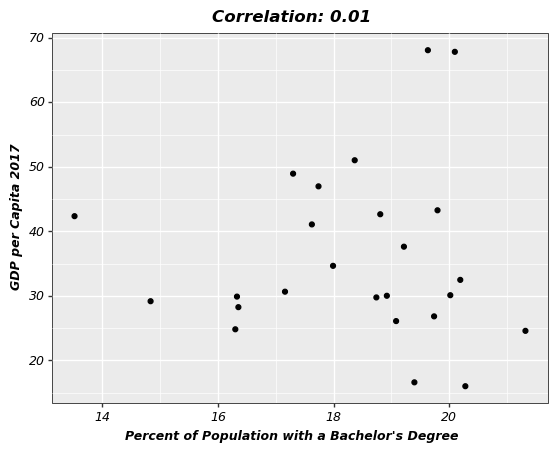

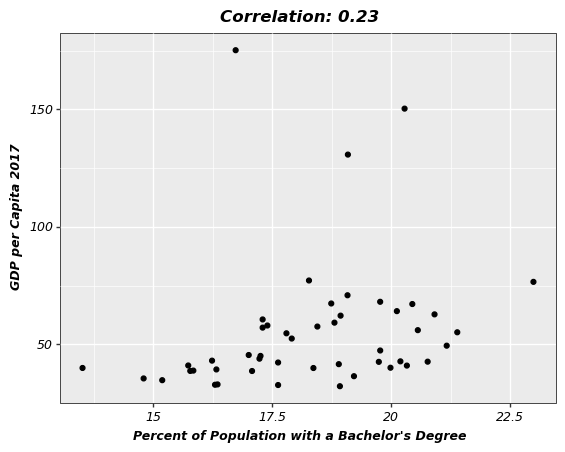

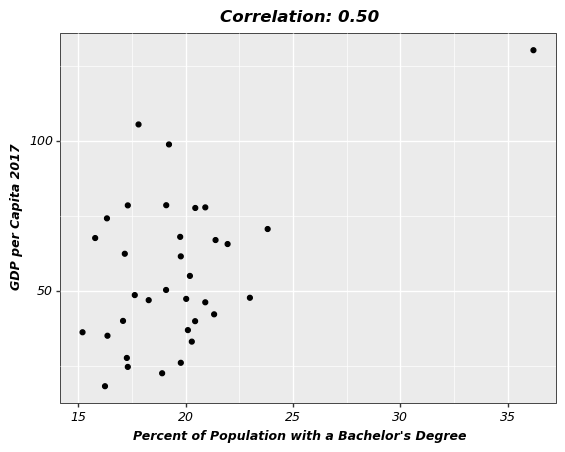

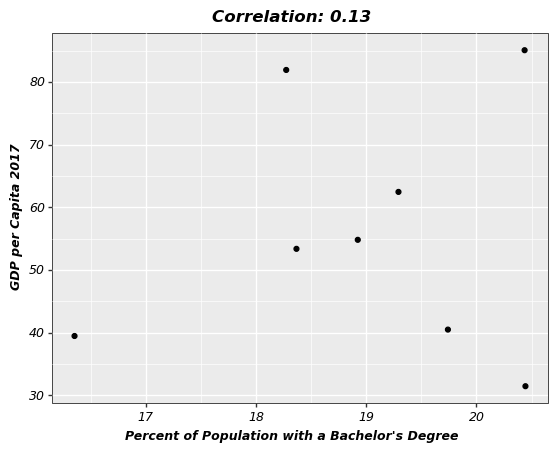

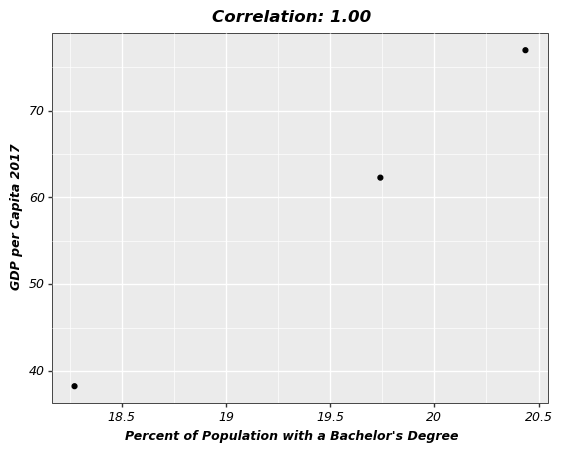

/Users/albertomartino/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/albertomartino/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide


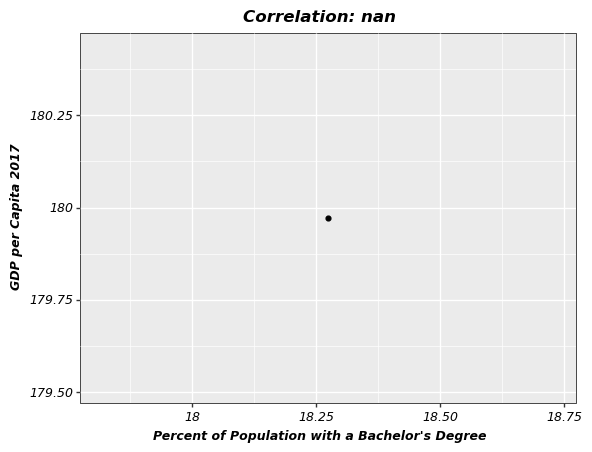

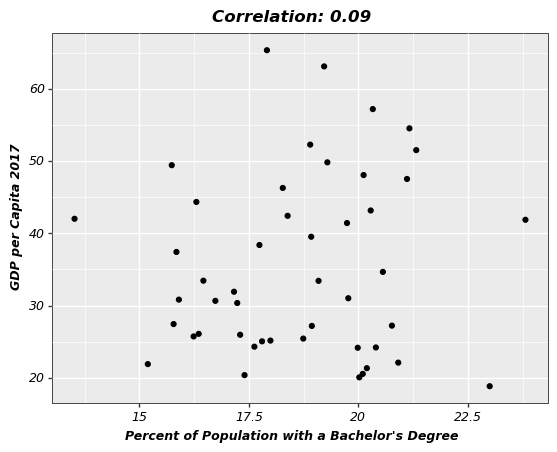

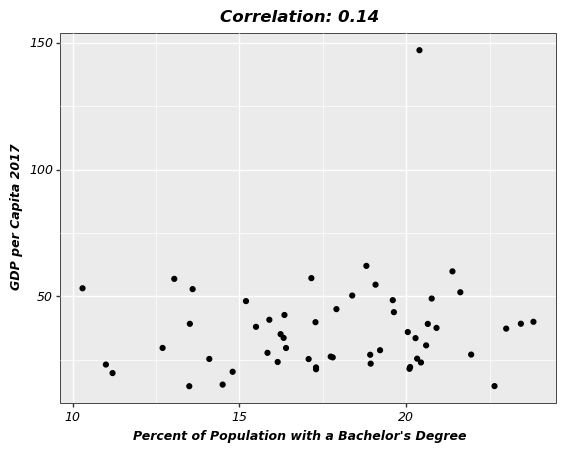

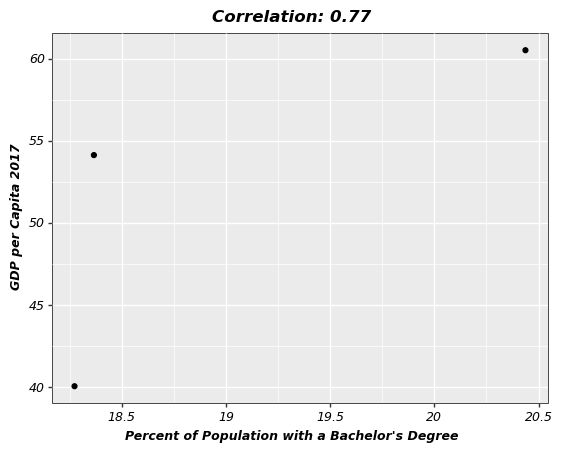

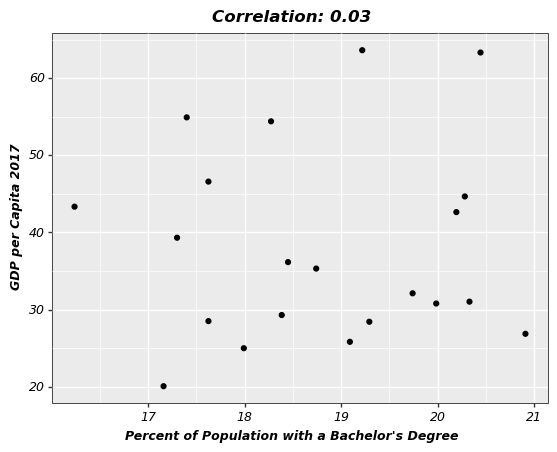

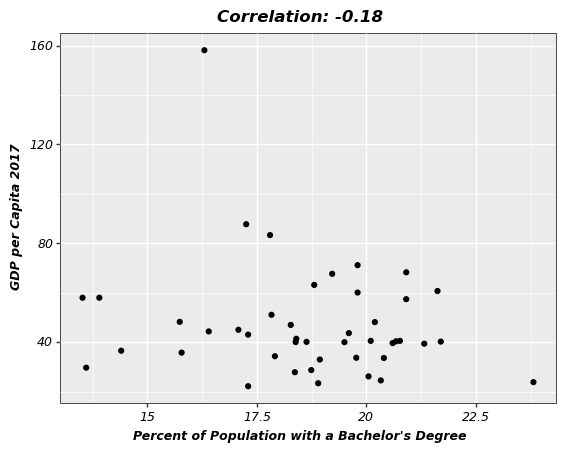

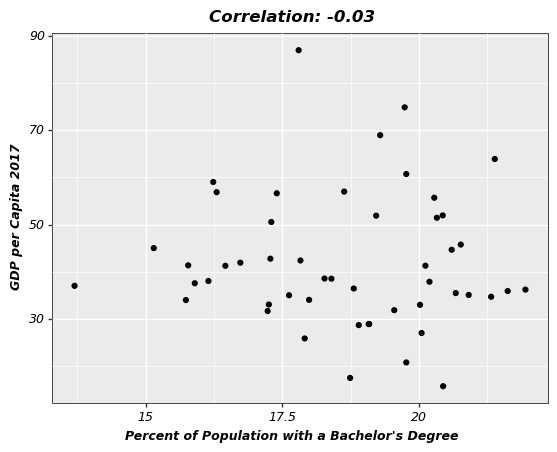

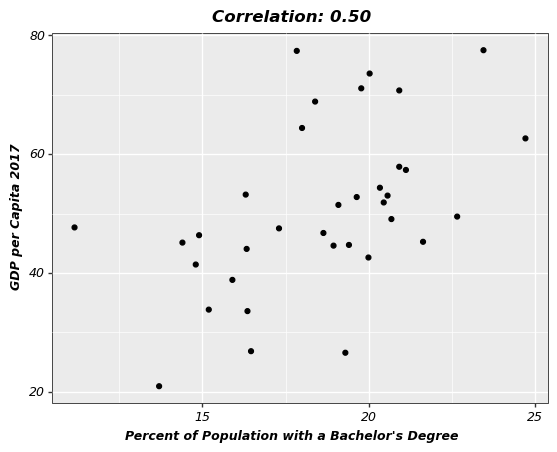

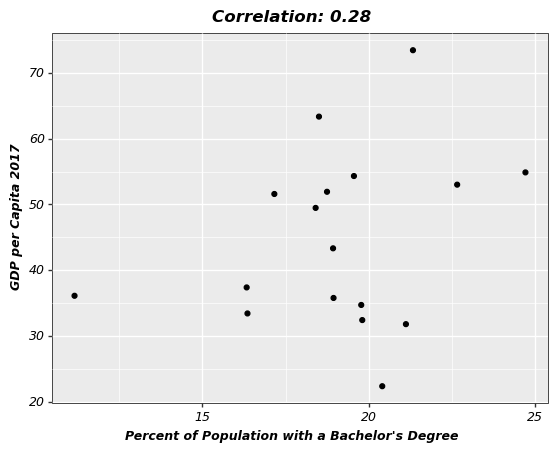

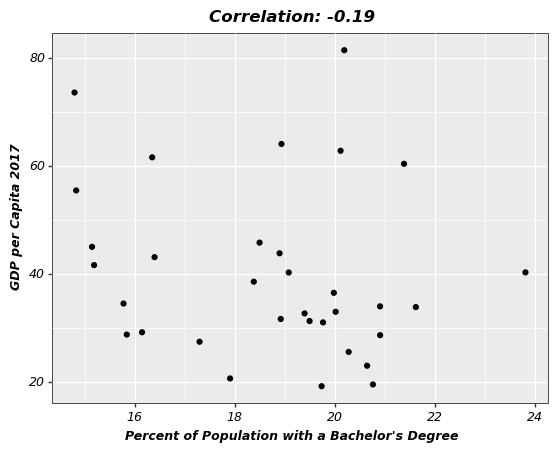

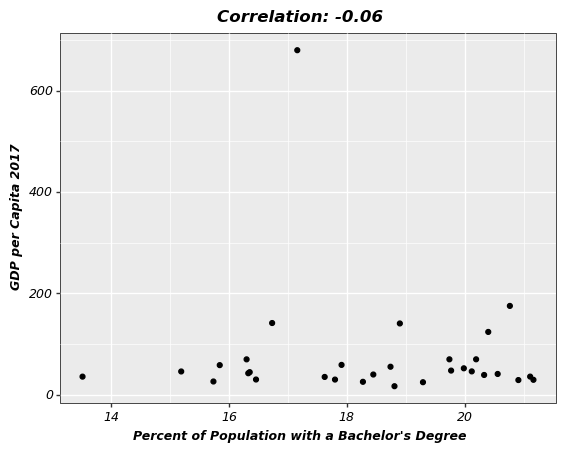

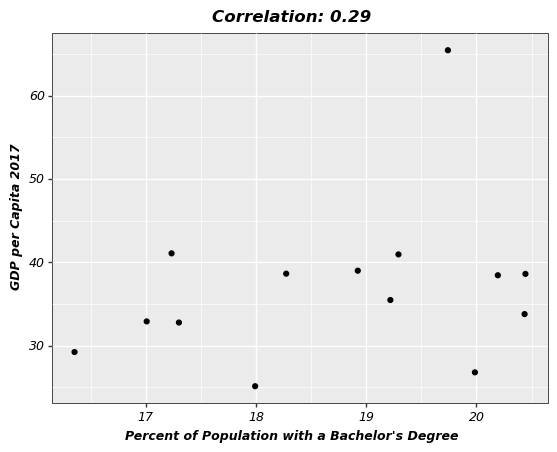

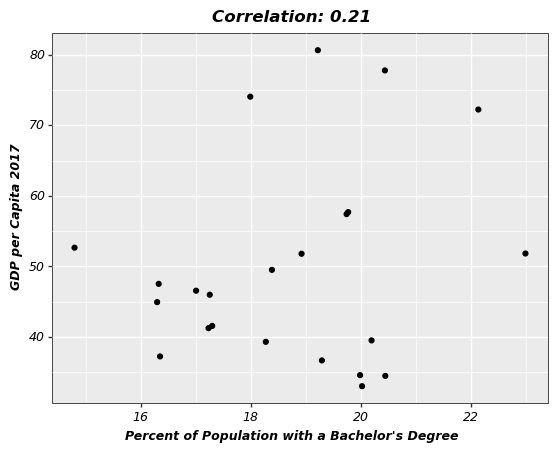

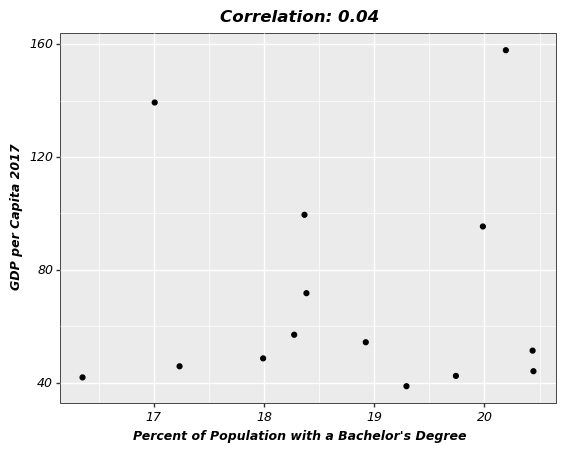

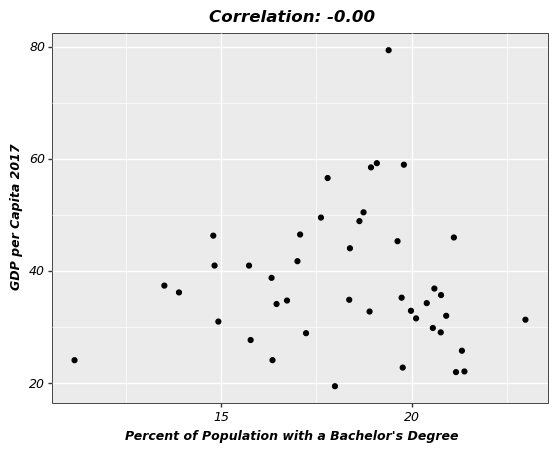

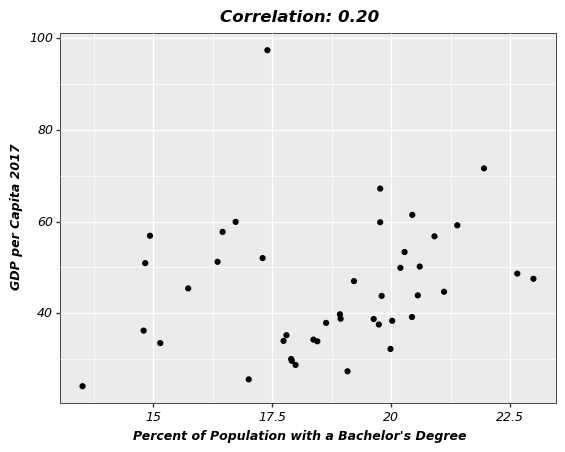

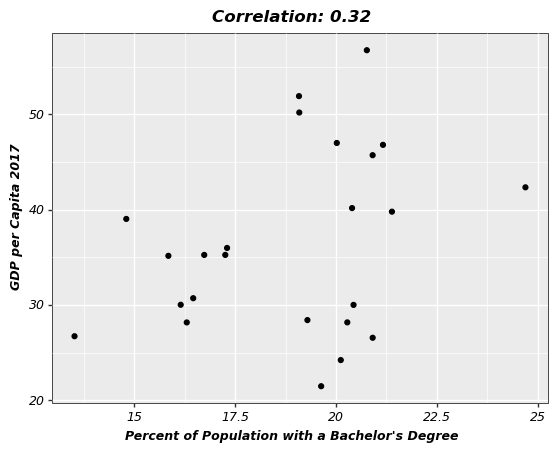

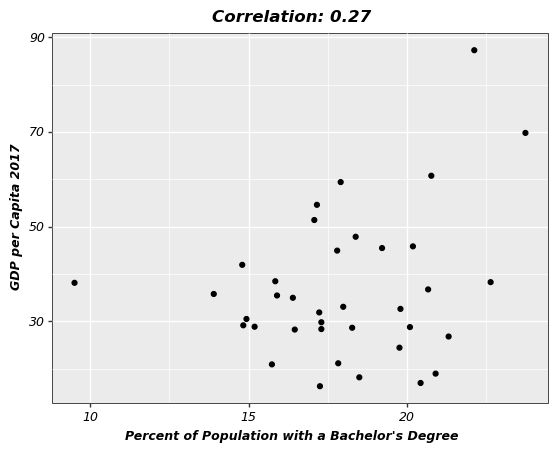

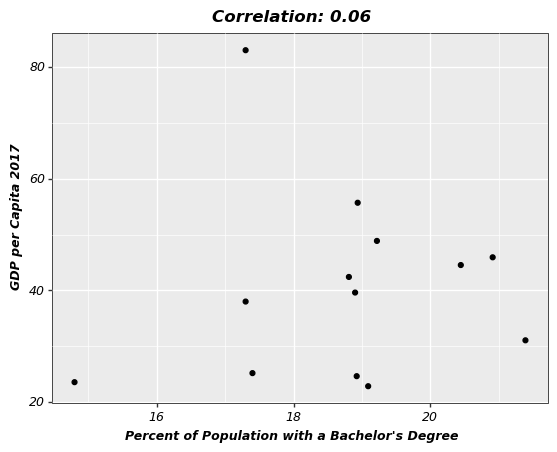

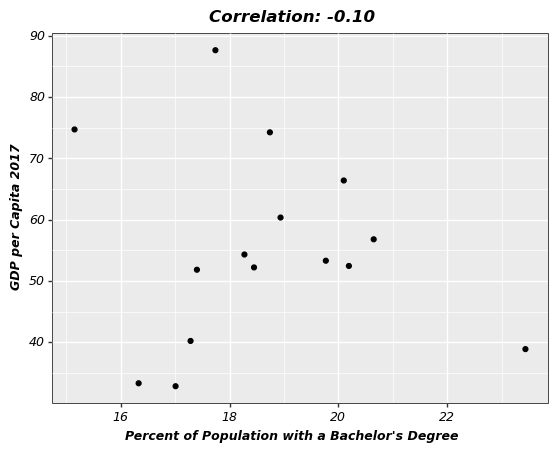

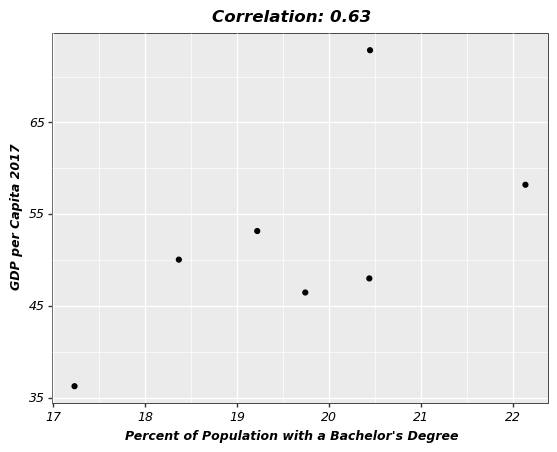

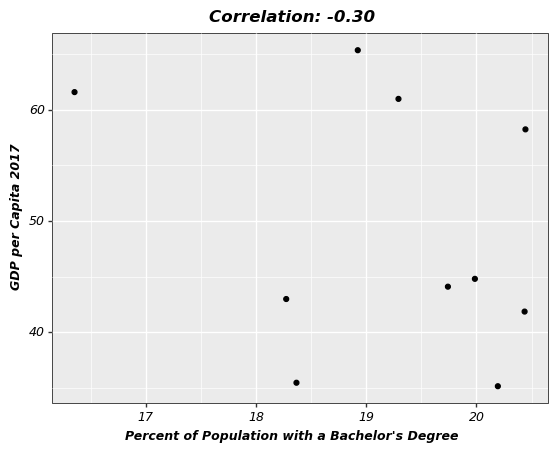

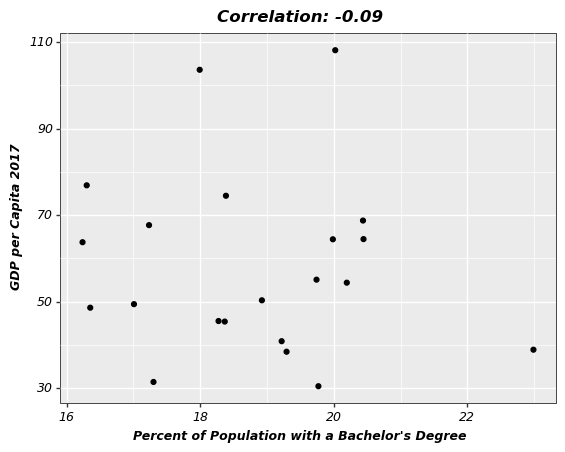

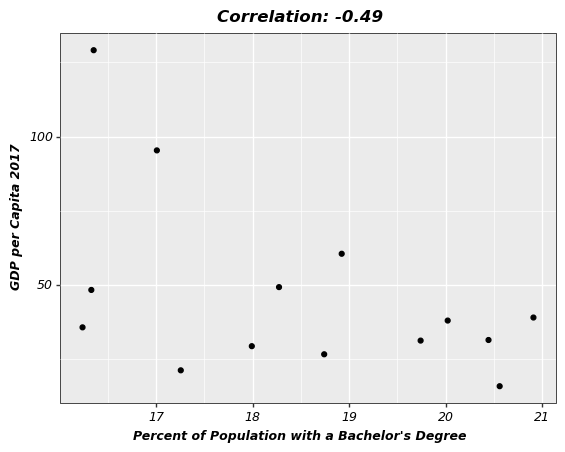

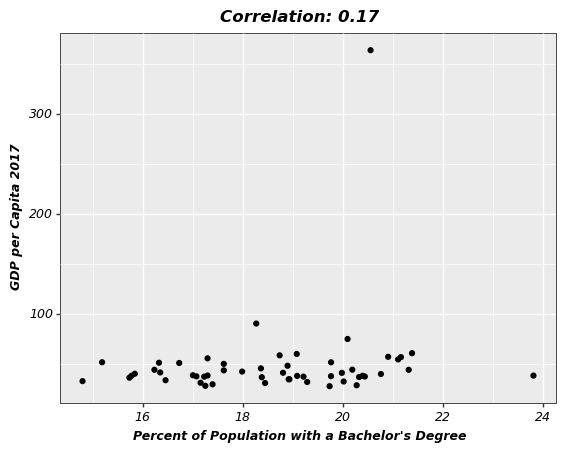

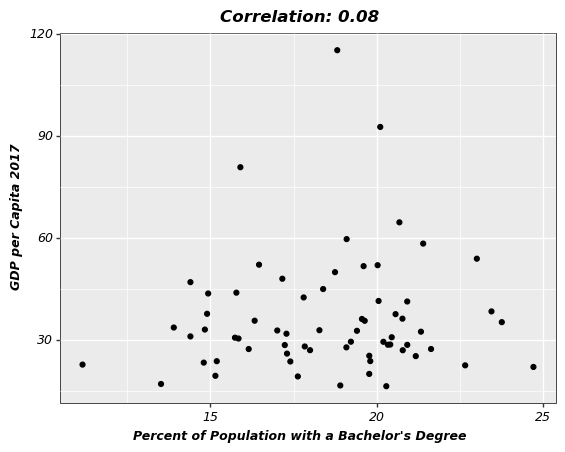

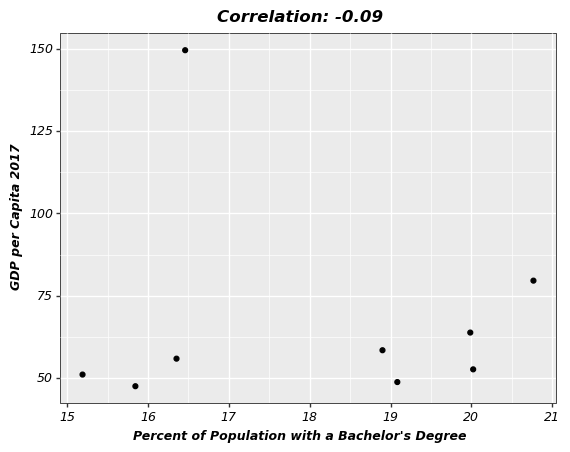

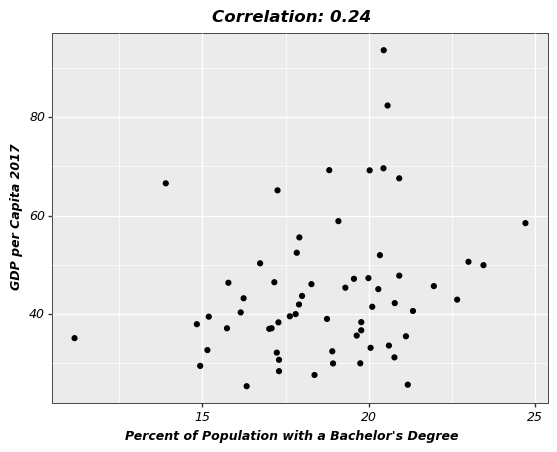

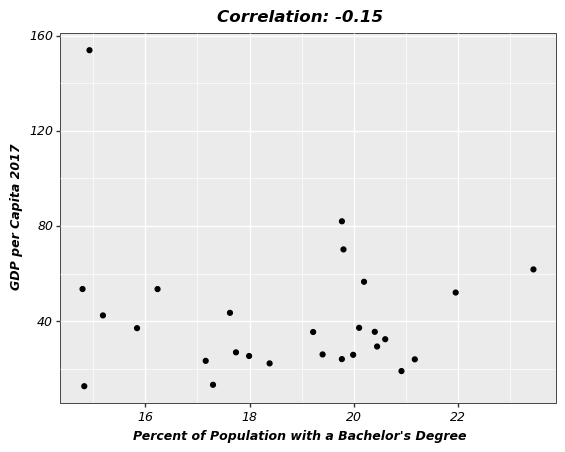

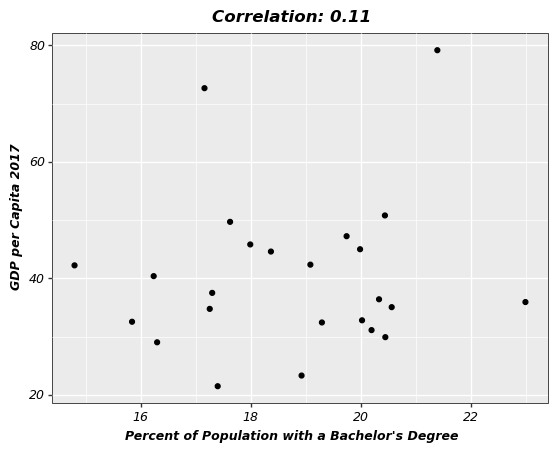

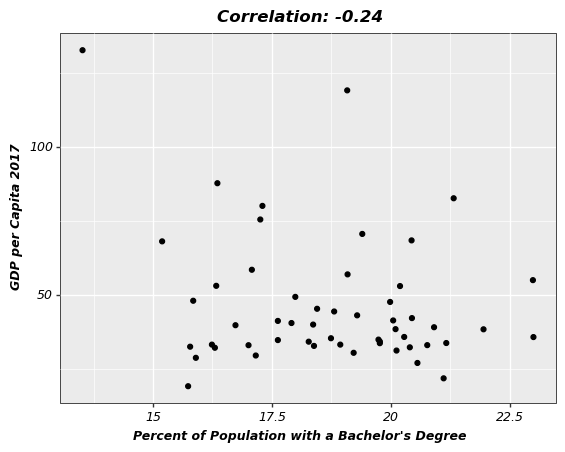

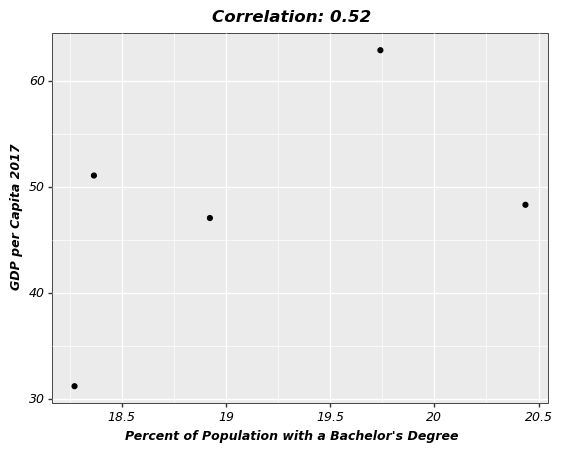

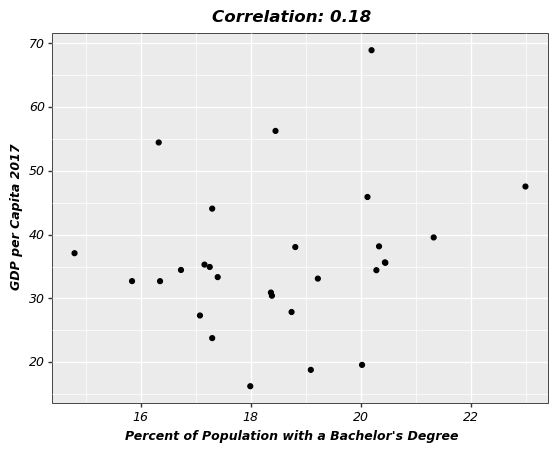

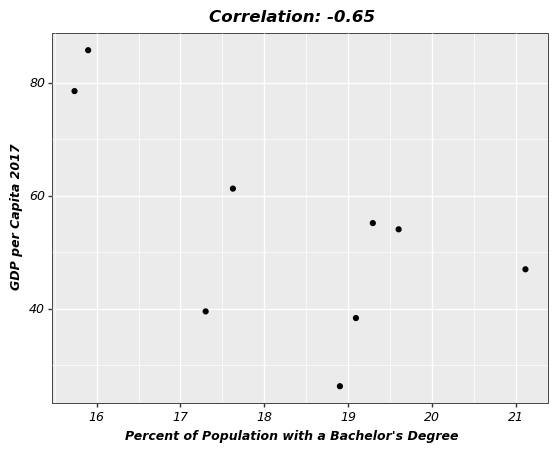

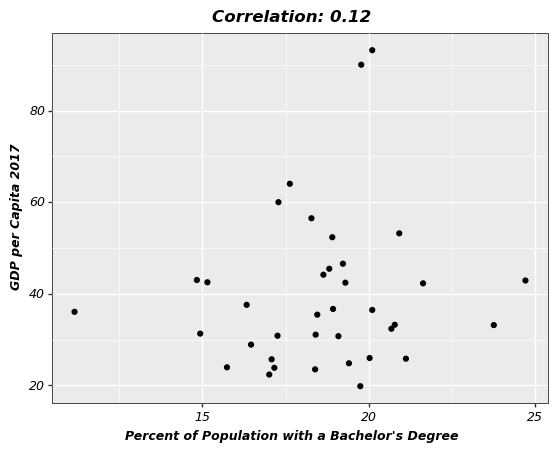

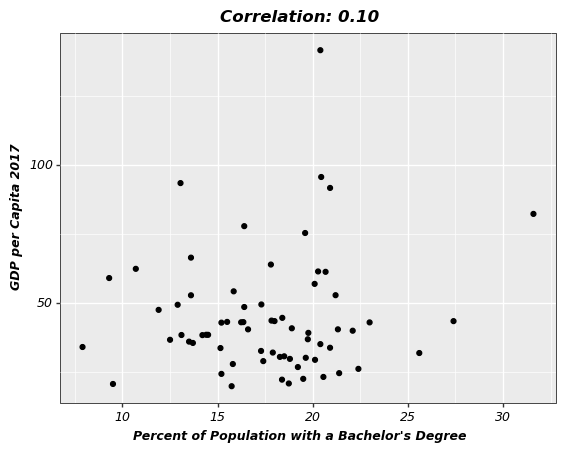

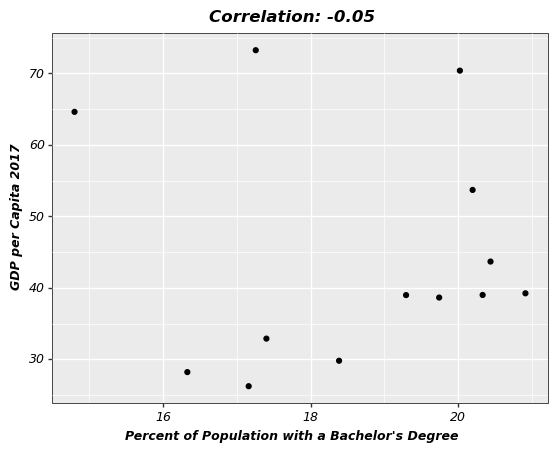

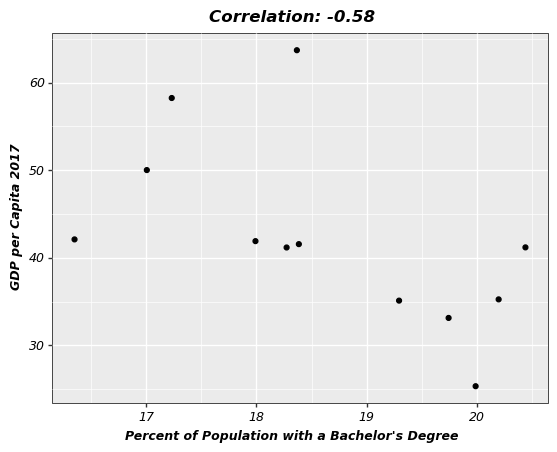

In [8]:



desired_values = range(1, 51)

correlation_data = {'State': [], 'Correlation Coefficient': []}
# Loop through each desired value
for desired_value in desired_values:
    # Filter the data based on the condition
    filtered_data = df[df['state'] == desired_value]
    
    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
        correlation_data['State'].append(desired_value)
        correlation_data['Correlation Coefficient'].append(correlation_coefficient)
    
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None))
        
        
        print(plot)  


In [ ]:
correlation_df = pd.DataFrame(correlation_data)
correlation_df

,State,Correlation Coefficient
0,1,0.129137
1,2,0.676317
2,4,0.516478
3,5,0.006553
4,6,0.232455
5,8,0.501083
6,9,0.126762
7,10,0.997922
8,11,NaN
9,12,0.090654


In [ ]:
correlation_average = correlation_df['Correlation Coefficient'].mean()
correlation_average

0.11833810039951646

In [ ]:
highest_value = correlation_df["Correlation Coefficient"].max()

In [ ]:
highest_values = correlation_df.nlargest(5, "Correlation Coefficient")

In [ ]:
highest_values

,State,Correlation Coefficient
7,10,0.997922
11,15,0.765351
1,2,0.676317
28,32,0.632882
39,44,0.516789


In [ ]:
highest_value

0.9979223333885104

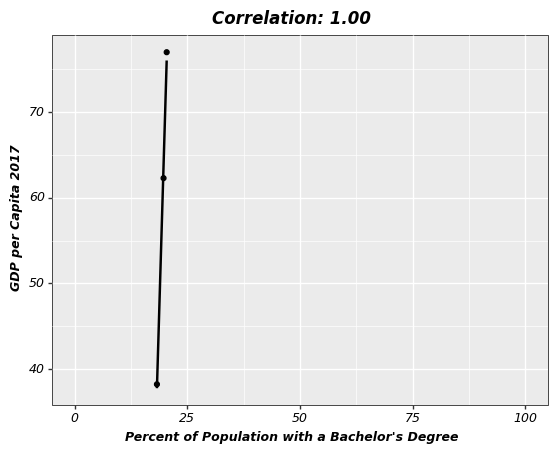

In [ ]:


    filtered_data = df[df['state'] == 10]
    
    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
    
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None)) + geom_smooth(method='lm', se=False)
        
        
        
        print(plot)  

We see that for the counties with the highest correlation coefficient, we also have very few data points. 

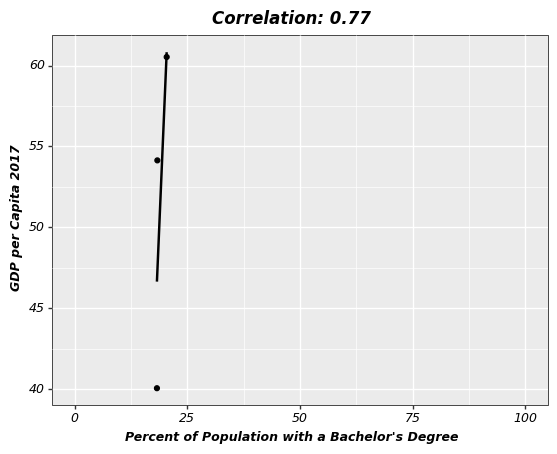

In [ ]:

    filtered_data = df[df['state'] == 15]
    
    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
    
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None)) + geom_smooth(method='lm', se=False)
        
        
        
        print(plot)  

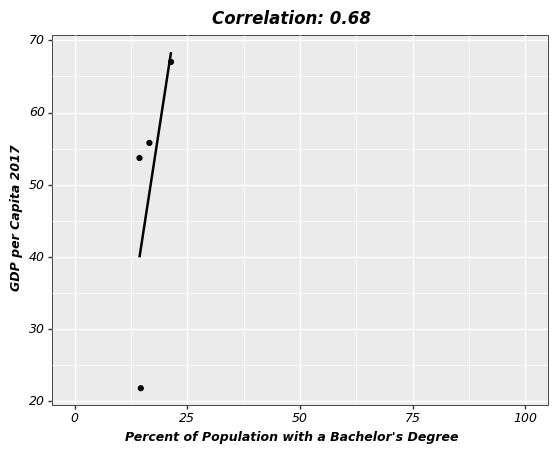

In [ ]:


    filtered_data = df[df['state'] == 2]
    
    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
    
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None)) + geom_smooth(method='lm', se=False)
        
        
        
        print(plot)  

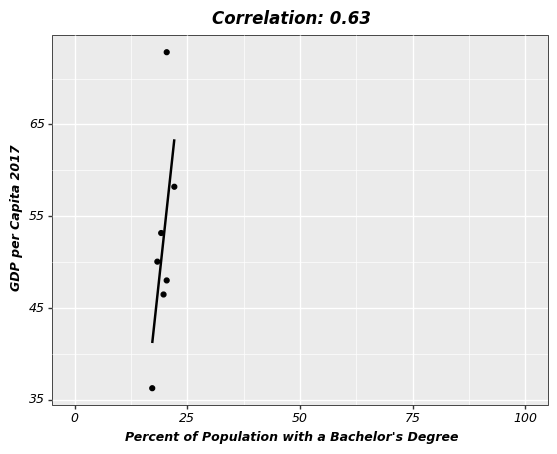

In [ ]:


    filtered_data = df[df['state'] == 32]
    
    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
    
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None)) + geom_smooth(method='lm', se=False)
        
        
        
        print(plot)  

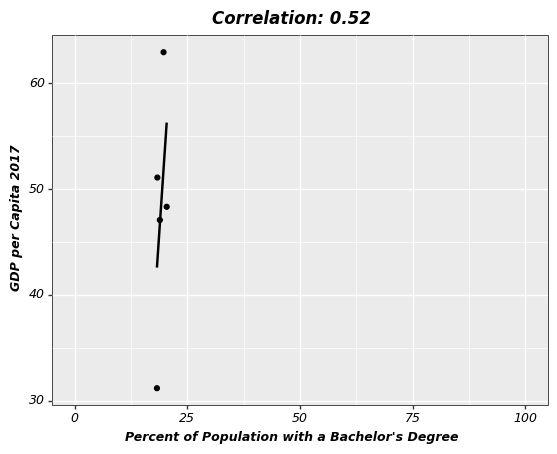

In [ ]:

    filtered_data = df[df['state'] == 44]
    
    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
    
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None)) + geom_smooth(method='lm', se=False)
        
        
        
        print(plot)  

In [ ]:
lowest_values = correlation_df.nsmallest(5, "Correlation Coefficient")

In [ ]:
lowest_values

,State,Correlation Coefficient
41,46,-0.648940
31,35,-0.493177
29,33,-0.302200
38,42,-0.240103
17,21,-0.193707


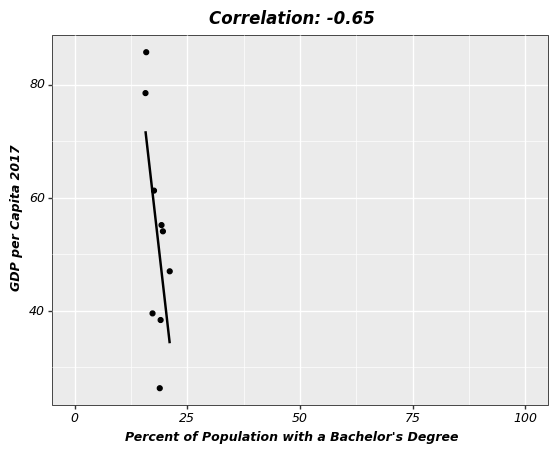

In [ ]:



    filtered_data = df[df['state'] == 46]
    
    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
        
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None)) + geom_smooth(method='lm', se=False)
        
        
        print(plot)  


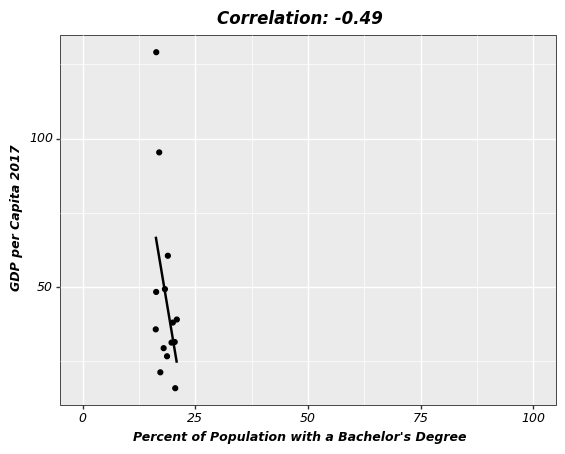

In [ ]:

    filtered_data = df[df['state'] == 35]
    
    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
        
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None)) + geom_smooth(method='lm', se=False)
        
        
        print(plot)  

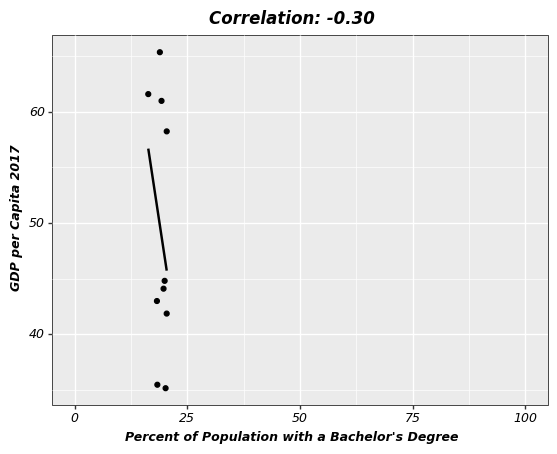

In [ ]:

    filtered_data = df[df['state'] == 33]

    
    if not filtered_data.empty:
        # Calculate the correlation coefficient
        correlation_coefficient = filtered_data["Percent of Population with a Bachelor's Degree"].corr(filtered_data["GDP per Capita 2017"])
        correlation_text = f"Correlation: {correlation_coefficient:.2f}"
        
        
        
        plot = (ggplot(filtered_data, aes(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017")) +
                geom_point() +
                labs(x="Percent of Population with a Bachelor's Degree", y="GDP per Capita 2017", title=correlation_text)) + \
                theme(text=element_text(family='DejaVu Sans',
                            size=9, color = 'black', face = 'italic'),
          axis_title=element_text(face='bold'),
          axis_text=element_text(face='italic'),
          plot_title=element_text(face='bold',
                                  size=12)) + \
          scale_x_continuous(limits=(0, 100)) + \
          theme(panel_border=element_rect(linewidth=0.5, color='black', fill=None)) + geom_smooth(method='lm', se=False)
        
        
        print(plot)  